In [1]:
###### important Libraries ######
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from Levenshtein import ratio
from nltk.stem import PorterStemmer
pd.set_option('display.max_colwidth', None)
from textblob import Word
import random
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [3]:
###### Import Data Set ######
data=pd.read_csv("final_data.csv",index_col='Unnamed: 0')
data.reset_index(drop=True,inplace=True)
data

,Questions,Answer
0,What is Linear Regression Algorithm?,"In simple terms: It is a method of finding the best straight line fitting to the given dataset, i.e. tries to find the best linear relationship between the independent and dependent variables.In technical terms: It is a supervised machine learning algorithm that finds the best linear-fit relationship on the given dataset, between independent and dependent variables. It is mostly done with the help of the Sum of Squared Residuals Method, known as the Ordinary least squares (OLS) method. Image Source: Google Images"
1,How do you interpret a linear regression model?,"As we know that the linear regression model is of the form:The significance of the linear regression model lies in the fact that we can easily interpret and understand the marginal changes in the independent variables(predictors) and observed their consequences on the dependent variable(response).Therefore, a linear regression model is quite easy to interpret.For Example, if we increase the value of x1 increases by 1 unit, keeping other variables constant, then the total increase in the value of y will be βi and the intercept term (β0) is the response when all the predictor’s terms are set to zero or not considered."
2,What are the basic assumptions of the Linear Regression Algorithm?,"The basic assumptions of the Linear regression algorithm are as follows: Linearity: The relationship between the features and target. Homoscedasticity: The error term has a constant variance. Multicollinearity: There is no multicollinearity between the features. Independence: Observations are independent of each other. Normality: The error(residuals) follows a normal distribution. Now, let’s break these assumptions into different categories:It is assumed that there exists a linear relationship between the dependent and the independent variables. Sometimes, this assumption is known as the ‘linearity assumption’. Normality assumption: The error terms, ε(i), are normally distributed. Zero mean assumption: The residuals have a mean value of zero. Constant variance assumption: The residual terms have the same (but unknown) value of variance, σ2. This assumption is also called the assumption of homogeneity or homoscedasticity. Independent error assumption: The residual terms are independent of each other, i.e. their pair-wise covariance value is zero. The independent variables are measured without error. There does not exist a linear dependency between the independent variables, i.e. there is no multicollinearity in the data."
3,Explain the difference between Correlation and Regression.,Correlation: It measures the strength or degree of relationship between two variables. It doesn’t capture causality. It is visualized by a single point.Regression: It measures how one variable affects another variable. Regression is all about model fitting. It tries to capture the causality and describes the cause and the effect. It is visualized by a regression line.
4,Explain the Gradient Descent algorithm with respect to linear regression.,"Gradient descent is a first-order optimization algorithm. In linear regression, this algorithm is used to optimize the cost function to find the values of the βs (estimators) corresponding to the optimized value of the cost function.The working of Gradient descent is similar to a ball that rolls down a graph (ignoring the inertia). In that case, the ball moves along the direction of the maximum gradient and comes to rest at the flat surface i.e, corresponds to minima.Mathematically, the main objective of the gradient descent for linear regression is to find the solution of the following expression,ArgMin J(θ0, θ1), where J(θ0, θ1) represents the cost function of the linear regression. It is given by :Here, h is the linear hypothesis model, defined as h=θ0 + θ1x,y is the target column or output, and m is the number of data points in the training set.Step-1: Gradient Descent starts with a random solution,Step-2: Ba

In [4]:
##### Check meta data #####
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  711 non-null    object
 1   Answer     711 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


In [5]:
##### Null values ######
data.isna().sum()

Questions    0
Answer       0
dtype: int64

In [6]:
###### Preprocessing on Question Column #######
data['question_clean'] = data['Questions'].str.replace('[^\w\s]','')
data['question_clean'] = data['question_clean'].str.replace('-',' ')
data['question_clean'] = data['question_clean'].str.replace('[?“”]','')
data['question_clean'] = data['question_clean'].apply(word_tokenize)
data['question_clean'] = data['question_clean'].apply(lambda x: [word.lower() for word in x])
stop_words = stopwords.words('english')
new_words=('explain','following','given','describe','ie','find','using','suppose','define','meaning','image','name','required','interview','discus''detail','indepth','short','brief','number','12','many','give','help','used','one','two','could','Algorithm','algorithm','basic','difference','respect','model')
for i in new_words:
    stop_words.append(i)
data['question_clean'] = data['question_clean'].apply(lambda x: [word for word in x if word not in stop_words])
data['question_clean'] = [' '.join(map(str, l)) for l in data['question_clean']]
stemmer=PorterStemmer()
data['question_clean'] = data['question_clean'].apply(lambda x: " ".join(sorted([stemmer.stem(word) for word in x.split()])))
wordnet_lemmatizer = WordNetLemmatizer()
data['question_clean'] = data['question_clean'].apply(lambda x: " ".join(sorted([wordnet_lemmatizer.lemmatize(word) for word in x.split()])))

In [7]:
###### Check some rows ######
data.head()

,Questions,Answer,question_clean
0,What is Linear Regression Algorithm?,"In simple terms: It is a method of finding the best straight line fitting to the given dataset, i.e. tries to find the best linear relationship between the independent and dependent variables.In technical terms: It is a supervised machine learning algorithm that finds the best linear-fit relationship on the given dataset, between independent and dependent variables. It is mostly done with the help of the Sum of Squared Residuals Method, known as the Ordinary least squares (OLS) method. Image Source: Google Images",linear regress
1,How do you interpret a linear regression model?,"As we know that the linear regression model is of the form:The significance of the linear regression model lies in the fact that we can easily interpret and understand the marginal changes in the independent variables(predictors) and observed their consequences on the dependent variable(response).Therefore, a linear regression model is quite easy to interpret.For Example, if we increase the value of x1 increases by 1 unit, keeping other variables constant, then the total increase in the value of y will be βi and the intercept term (β0) is the response when all the predictor’s terms are set to zero or not considered.",interpret linear regress
2,What are the basic assumptions of the Linear Regression Algorithm?,"The basic assumptions of the Linear regression algorithm are as follows: Linearity: The relationship between the features and target. Homoscedasticity: The error term has a constant variance. Multicollinearity: There is no multicollinearity between the features. Independence: Observations are independent of each other. Normality: The error(residuals) follows a normal distribution. Now, let’s break these assumptions into different categories:It is assumed that there exists a linear relationship between the dependent and the independent variables. Sometimes, this assumption is known as the ‘linearity assumption’. Normality assumption: The error terms, ε(i), are normally distributed. Zero mean assumption: The residuals have a mean value of zero. Constant variance assumption: The residual terms have the same (but unknown) value of variance, σ2. This assumption is also called the assumption of homogeneity or homoscedasticity. Independent error assumption: The residual terms are independent of each other, i.e. their pair-wise covariance value is zero. The independent variables are measured without error. There does not exist a linear dependency between the independent variables, i.e. there is no multicollinearity in the data.",assumpt linear regress
3,Explain the difference between Correlation and Regression.,Correlation: It measures the strength or degree of relationship between two variables. It doesn’t capture causality. It is visualized by a single point.Regression: It measures how one variable affects another variable. Regression is all about model fitting. It tries to capture the causality and describes the cause and the effect. It is visualized by a regression line.,correl regress
4,Explain the Gradient Descent algorithm with respect to linear regression.,"Gradient descent is a first-order optimization algorithm. In linear regression, this algorithm is used to optimize the cost function to find the values of the βs (estimators) corresponding to the optimized value of the cost function.The working of Gradient descent is similar to a ball that rolls down a graph (ignoring the inertia). In that case, the ball moves along the direction of the maximum gradient and comes to rest at the flat surface i.e, corresponds to minima.Mathematically, the main objective of the gradient descent for linear regression is to find the solution of the following expression,ArgMin J(θ0, θ1), where J(θ0, θ1) represents the cost function of the linear regression. It is given by :Here, h is the linear hypothesis model, defined as h=θ0 + θ1x,y is the target column or output, and m is the number of data

In [8]:
que=''.join(data['question_clean'])
que

'linear regressinterpret linear regressassumpt linear regresscorrel regressdescent gradient linear regresscase dataset justifi linear regress suitablevalu list metric regressinterpret linear plot qq regressdataset justif linear proper regress residu sum valucalcul mse rmseolmae mapedomain least ordinari squaresstatistdescentcalculu famili gradientdataset evalu lot metric outlier prefer useequat form linear normal regressdescent equat gradient instead linear method normal prefer regressadjust rsquar rsquarflaw rsquarmulticollineardetect heteroscedastdisadvantag linear regresscalcul vifanalysi appli linear possibl regress seri timeassumpt import linear regressheteroscedastadjust r r squar squarmse rmseaccuraci improv linear possibl regress wayinterpret linear plot qq regressftest linear significdisadvantag linearlinear regressl1 l2 regularis regularis usechoos learn paramet rate valu αchoos paramet regularis valu λanalysi linear regress seri time useclose justifi linear regress residu su

In [9]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

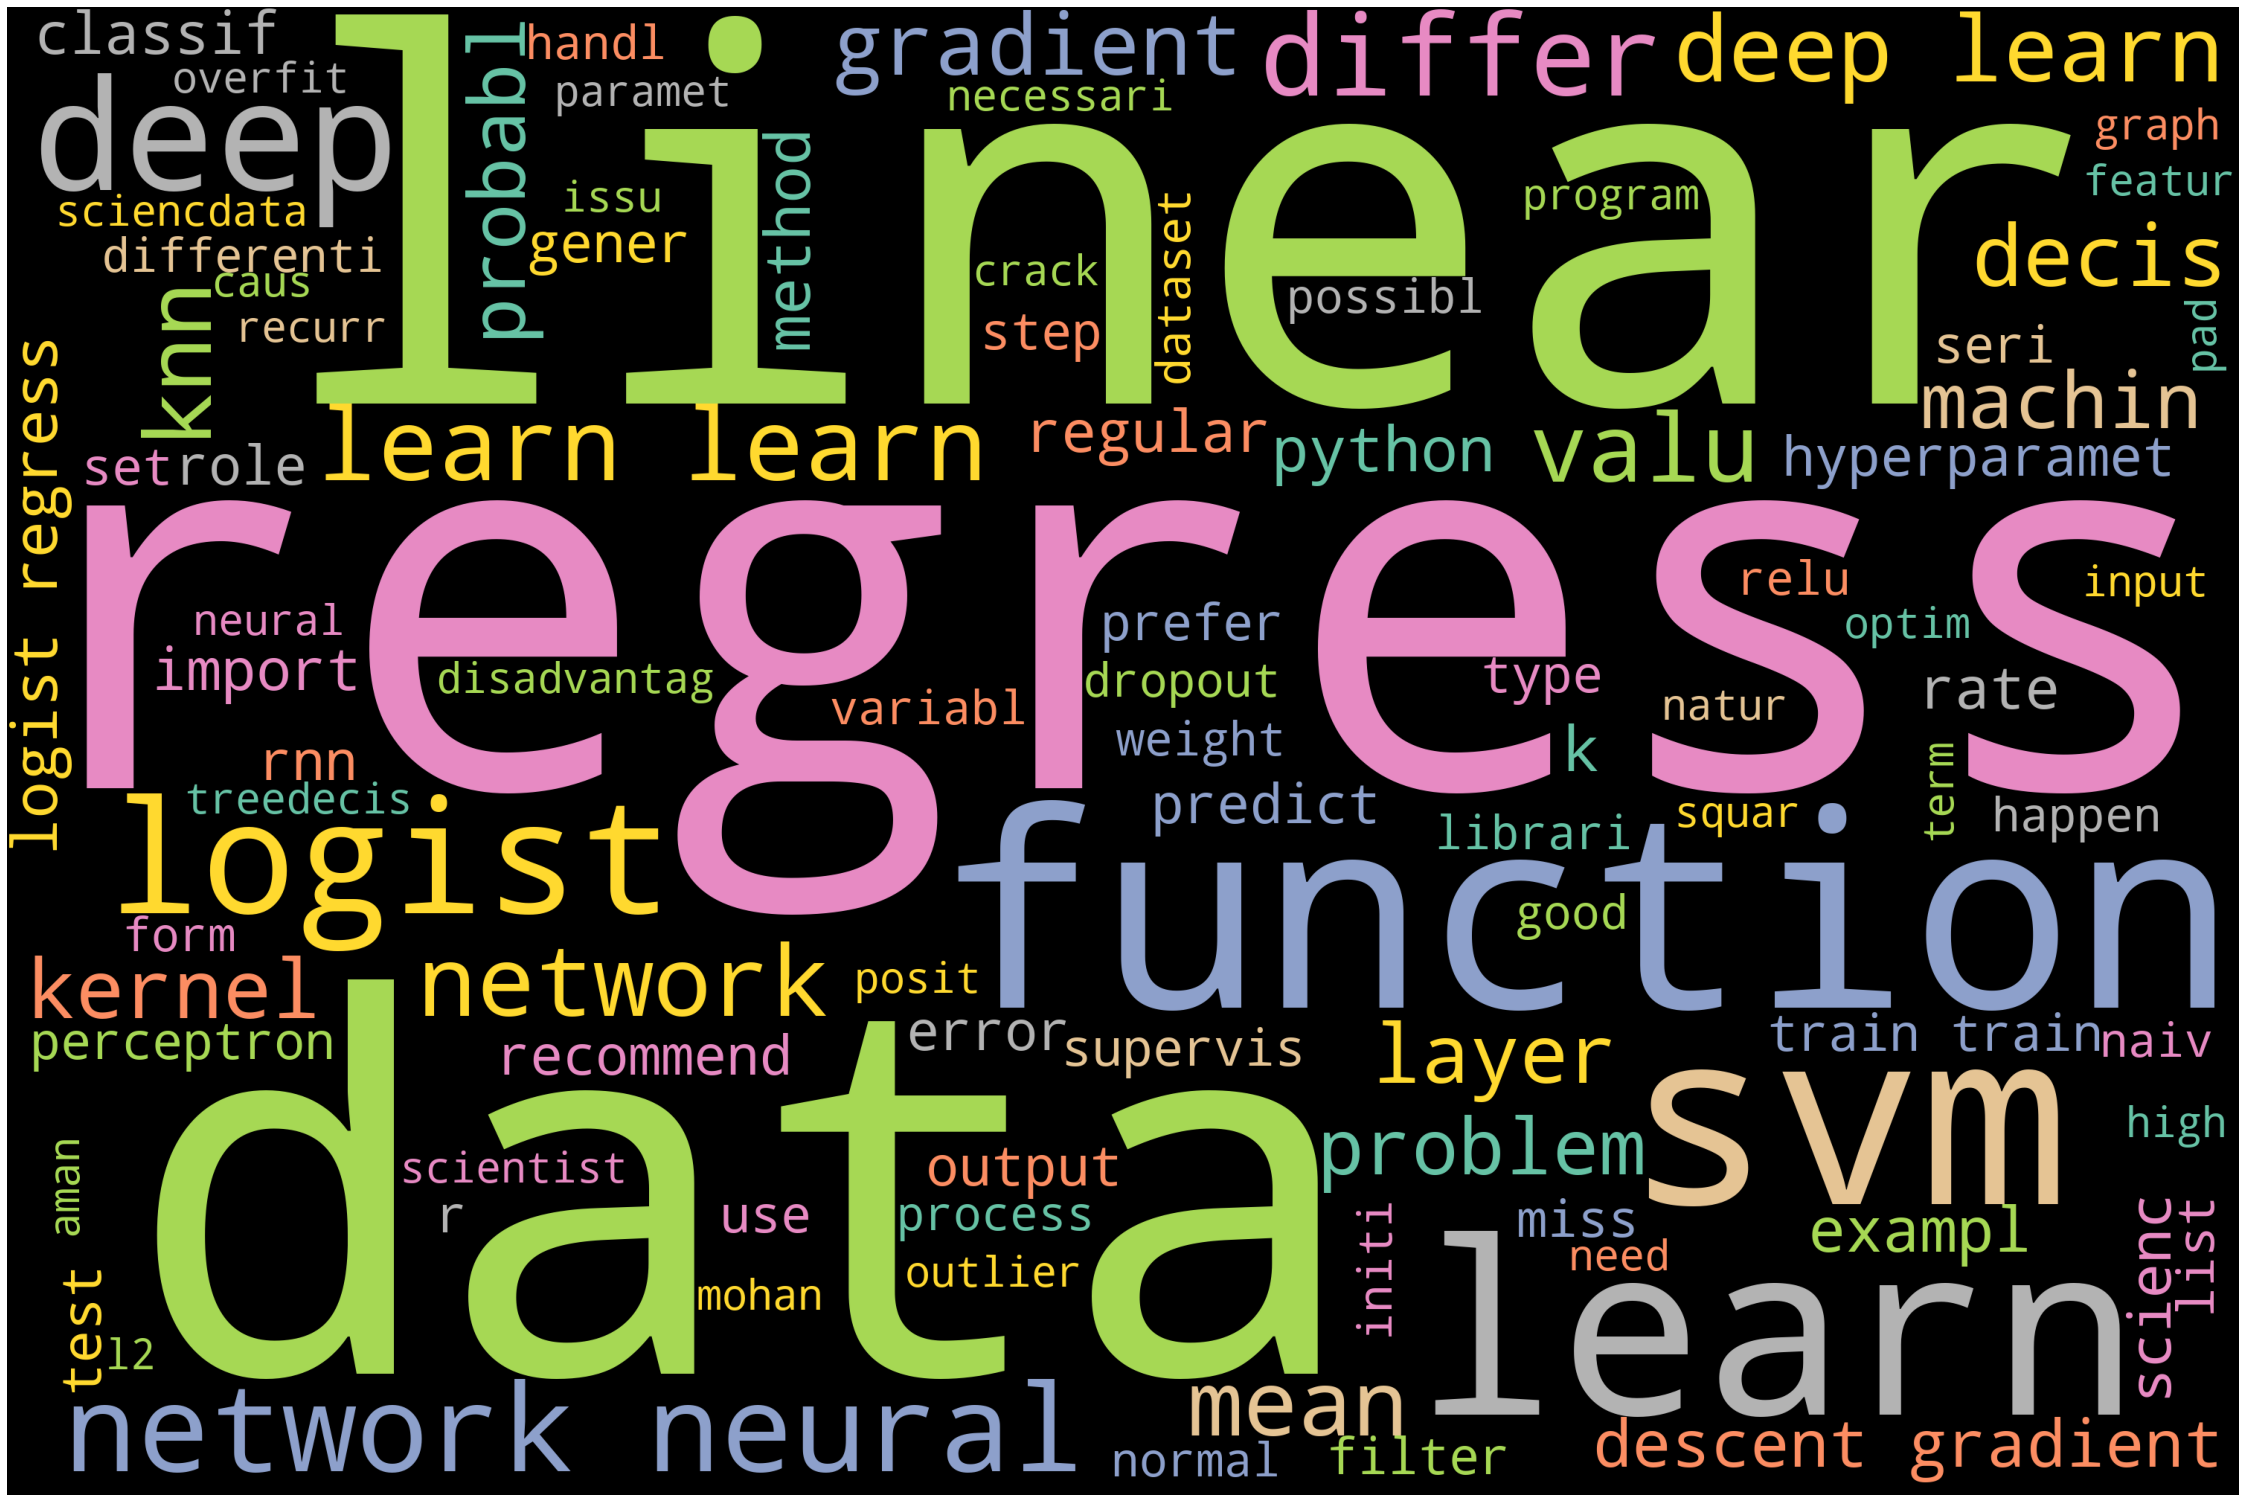

In [10]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stop_words).generate(que)
# Plot
plot_cloud(wordcloud)

In [11]:
##### Greeting Messagess #####
greeting_inputs = ("hey", "good morning", "good evening", "morning", "evening", "hi", "whatsup","hello")
greeting_responses = ["Hey..", "Hello..", "Hi..","Welcome", "whatsup"]

def generate_greeting_response(greeting):
    for token in greeting.split():
        if token.lower() in greeting_inputs:
            return random.choice(greeting_responses)

In [12]:
from termcolor import colored

In [13]:
def generate_response(user_input,data,stop_words):
    sarthi_response = ''
    user_input=str(user_input)
    user_input =re.sub(r'[^\w\s]', '', user_input)
    user_input = user_input.replace('-',' ')
    user_input = re.sub(r'[\?\.\/]',' ',user_input)
    user_input = user_input.split()
    user_input = (lambda user_input: [word.lower() for word in user_input])(user_input)
    user_input = (lambda user_input: [word for word in user_input if word not in stop_words])(user_input)
    stemmer=PorterStemmer()
    user_input = (lambda user_input:sorted([stemmer.stem(word) for word in user_input]))(user_input)
    wordnet_lemmatizer = WordNetLemmatizer()
    user_input = (lambda user_input:" ".join(sorted([wordnet_lemmatizer.lemmatize(word) for word in user_input])))(user_input)
#     print(user_input)
    
    match_count=data["question_clean"].str.contains(user_input).sum()
    if match_count==0:
        sarthi_response = colored(sarthi_response + "So sorry, I am designed to discuss on supervised machine learning only.",'red',attrs=['bold'])
        return sarthi_response
    else:
        for idx, row in data.iterrows():
            score = ratio(row["question_clean"], user_input)
            if score >= 0.90: # I'm sure, stop here
                return row["Answer"]
        else:
            sarthi_response=colored(sarthi_response + "I am sorry, I could not understand you.",'red',attrs=['bold'])
        return sarthi_response

In [14]:
continue_dialogue = True
print(colored("Hello, I am your friend SARTHI. You can ask me any question regarding supervised learning:",'magenta',attrs=['bold']))
while(continue_dialogue == True):
    print(colored("\nUSER:",'green',attrs=['bold']),end=" ")
    human_text = input()
    human_text = human_text.lower()
    if human_text != 'bye':
        if human_text == 'thanks' or human_text == 'thank you very much' or human_text == 'thank you':
            continue_dialogue = False
            print(colored("SARTHI: Most welcome..",'yellow',attrs=['bold']))
        else:
            if generate_greeting_response(human_text) != None:
                print(colored("\nSARTHI: ",'grey',attrs=['bold']) + colored(generate_greeting_response(human_text),'blue',attrs=['bold']))
            else:  
                print(colored(colored("\nSARTHI: ",'grey',attrs=['bold']),'green',attrs=['bold']), end="")
                print(colored(generate_response(human_text,data,stop_words),'green',attrs=['bold']))
    else:
        continue_dialogue = False
        print(colored("SARTHI: Good bye and take care of yourself...",'cyan',attrs=['bold']))

Hello, I am your friend SARTHI. You can ask me any question regarding supervised learning:

USER: hi

SARTHI: Hello..

USER: What is Data Science ??

SARTHI: Data Science is a field of computer science that explicitly deals with turning data into information and extracting meaningful insights out of it. The reason why Data Science is so popular is that the kind of insights it allows us to draw from the available data has led to some major innovations in several products and companies. Using these insights, we are able to determine the taste of a particular customer, the likelihood of a product succeeding in a particular market, etc.  Data Science is a field of computer science that explicitly deals with turning data into information and extracting meaningful insights out of it. The reason why Data Science is so popular is that the kind of insights it allows us to draw from the available data has led to some major innovations in several products and companies. Using these insights, we a